In [1]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import itertools
from scipy import stats
import math
%matplotlib inline

# 1. CSV to ARFF

In [2]:
#Since we are using Python, we do  not need to complete this step

# Loading Data

## pandas.read_csv

In [3]:
file_path = "../../data/raw/"

X = pd.read_csv(f"{file_path}x_train_gr_smpl.csv", delimiter=',')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12660 entries, 0 to 12659
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 222.5 MB


In [4]:
# image = X.loc[[600]].values
# image = image[0].reshape((48,48))
# image.shape
# plt.imshow(image)

In [5]:
Y = pd.read_csv(f"{file_path}y_train_smpl.csv", delimiter=',')
Y.columns = ['target']

y0 = pd.read_csv(f"{file_path}y_train_smpl_0.csv", delimiter=',')
y0.columns = ['target']

y1 = pd.read_csv(f"{file_path}y_train_smpl_1.csv", delimiter=',')
y1.columns = ['target']

y2 = pd.read_csv(f"{file_path}y_train_smpl_2.csv", delimiter=',')
y2.columns = ['target']

y3 = pd.read_csv(f"{file_path}y_train_smpl_3.csv", delimiter=',')
y3.columns = ['target']

y4 = pd.read_csv(f"{file_path}y_train_smpl_4.csv", delimiter=',')
y4.columns = ['target']

y5 = pd.read_csv(f"{file_path}y_train_smpl_5.csv", delimiter=',')
y5.columns = ['target']

y6 = pd.read_csv(f"{file_path}y_train_smpl_6.csv", delimiter=',')
y6.columns = ['target']

y7 = pd.read_csv(f"{file_path}y_train_smpl_7.csv", delimiter=',')
y7.columns = ['target']

y8 = pd.read_csv(f"{file_path}y_train_smpl_8.csv", delimiter=',')
y8.columns = ['target']

y9 = pd.read_csv(f"{file_path}y_train_smpl_9.csv", delimiter=',')
y9.columns = ['target']

Y.tail()

,target
12655,9
12656,9
12657,9
12658,9
12659,9


# Create datasets

In [6]:
train_smpl_0 = pd.concat([X, y0], axis=1)
train_smpl_1 = pd.concat([X, y1], axis=1)

In [7]:
train_smpl_2 = pd.concat([X, y2], axis=1)
train_smpl_3 = pd.concat([X, y3], axis=1)

In [8]:
train_smpl_4 = pd.concat([X, y4], axis=1)
train_smpl_5 = pd.concat([X, y5], axis=1)

In [9]:
train_smpl_6 = pd.concat([X, y6], axis=1)
train_smpl_7 = pd.concat([X, y7], axis=1)

In [10]:
train_smpl_8 = pd.concat([X, y8], axis=1)
train_smpl_9 = pd.concat([X, y9], axis=1)

In [11]:
train_smpl = pd.concat([X, Y], axis=1)
train_smpl.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,target
0,30.0,29.0,28.0,29.0,31.0,30.0,29.0,28.0,27.0,26.0,...,32.0,35.0,38.0,39.0,39.0,40.0,39.0,39.0,38.0,0
1,31.0,31.0,33.0,32.0,31.0,30.0,29.0,28.0,28.0,28.0,...,34.0,35.0,36.0,36.0,37.0,38.0,38.0,37.0,37.0,0
2,30.0,30.0,31.0,29.0,28.0,27.0,26.0,28.0,30.0,31.0,...,35.0,37.0,37.0,38.0,39.0,38.0,38.0,39.0,40.0,0
3,26.0,25.0,24.0,24.0,24.0,27.0,28.0,29.0,29.0,30.0,...,34.0,36.0,37.0,38.0,42.0,40.0,37.0,36.0,36.0,0
4,25.0,26.0,28.0,28.0,28.0,28.0,28.0,27.0,26.0,25.0,...,31.0,33.0,37.0,38.0,37.0,36.0,36.0,35.0,35.0,0


# 2. Data Randomisation

## sklearn.utils.suffle

In [12]:
train_smpl = shuffle(train_smpl, random_state=42)
train_smpl_0 = shuffle(train_smpl_0, random_state=42)
train_smpl_1 = shuffle(train_smpl_1, random_state=42)
train_smpl_2 = shuffle(train_smpl_2, random_state=42)
train_smpl_3 = shuffle(train_smpl_3, random_state=42)
train_smpl_4 = shuffle(train_smpl_4, random_state=42)
train_smpl_5 = shuffle(train_smpl_5, random_state=42)
train_smpl_6 = shuffle(train_smpl_6, random_state=42)
train_smpl_7 = shuffle(train_smpl_7, random_state=42)
train_smpl_8 = shuffle(train_smpl_8, random_state=42)
train_smpl_9 = shuffle(train_smpl_9, random_state=42)
train_smpl.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,target
1236,25.0,24.0,28.0,27.0,24.0,22.0,22.0,22.0,21.0,21.0,...,34.0,33.0,34.0,36.0,35.0,35.0,34.0,34.0,35.0,0
8847,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,241.0,230.0,237.0,227.0,241.0,241.0,239.0,241.0,237.0,5
11285,34.0,34.0,34.0,33.0,32.0,31.0,31.0,30.0,30.0,30.0,...,16.0,14.0,12.0,11.0,11.0,11.0,13.0,17.0,19.0,8
12423,63.0,66.0,70.0,81.0,77.0,72.0,62.0,61.0,60.0,62.0,...,123.0,77.0,47.0,44.0,43.0,42.0,55.0,71.0,68.0,9
10020,38.0,39.0,40.0,50.0,61.0,72.0,93.0,138.0,185.0,233.0,...,62.0,68.0,68.0,81.0,98.0,86.0,73.0,68.0,65.0,6


# class distribution

(array([1410.,    0., 1860.,    0.,  420.,    0.,    0., 1320.,    0.,
        2100.,    0., 2160.,    0.,    0.,  780.,    0.,  240.,    0.,
        2070.,    0.,  300.]),
 array([0.        , 0.42857143, 0.85714286, 1.28571429, 1.71428571,
        2.14285714, 2.57142857, 3.        , 3.42857143, 3.85714286,
        4.28571429, 4.71428571, 5.14285714, 5.57142857, 6.        ,
        6.42857143, 6.85714286, 7.28571429, 7.71428571, 8.14285714,
        8.57142857, 9.        ]),
 <a list of 21 Patch objects>)

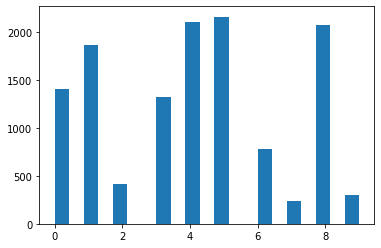

In [13]:
#train_smpl.hist(column='target')
plt.hist(Y['target'], bins='auto')

In [14]:
train_smpl.target.value_counts()

5    2160
4    2100
8    2070
1    1860
0    1410
3    1320
6     780
2     420
9     300
7     240
Name: target, dtype: int64

# 3. Reducing the size

#### Because the data runs the data as a Python file, we do not need to reduce the size of our data set. 



In [15]:
train_smpl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12660 entries, 1236 to 7270
Columns: 2305 entries, 0 to target
dtypes: float64(2304), int64(1)
memory usage: 222.7 MB


In [16]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import make_pipeline

In [17]:
# ros = RandomOverSampler(random_state=0)
# X_oversampled, y_oversampled = ros.fit_resample(X, Y['target'])
# plt.hist(y_oversampled, bins='auto')

(array([1000.,    0., 1000.,    0., 1000.,    0., 1000.,    0., 1000.,
           0.,    0., 1000.,    0., 1000.,    0., 1000.,    0., 1000.,
           0., 1000.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <a list of 20 Patch objects>)

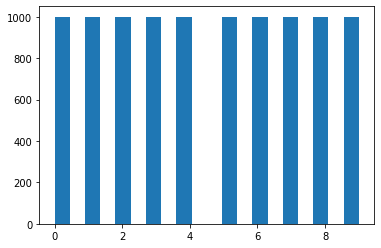

In [18]:

oversample_ratio={2: 1000,  6: 1000, 7: 1000, 9: 1000}
undersample_ratio={0: 1000, 1: 1000,  3: 1000, 4: 1000, 5: 1000, 8: 1000}
pipe = make_pipeline(SMOTE(sampling_strategy=oversample_ratio, n_jobs=7), NearMiss(sampling_strategy=undersample_ratio, n_jobs=7))

X_resampled, y_resampled = pipe.fit_resample(X, Y['target'])
plt.hist(y_resampled, bins='auto')

In [19]:

# rus = RandomUnderSampler(random_state=0)
# X_undersampled, y_undersampled = rus.fit_sample(X, Y)
# plt.hist(y_undersampled, bins='auto')

In [20]:
# X_oversampled = pd.DataFrame(data=X_oversampled)
# y_oversampled = pd.DataFrame(data=y_oversampled)
# y_oversampled.columns=(['target'])
# train_oversampled = pd.concat([X_oversampled, y_oversampled], axis=1)
# train_oversampled = shuffle(train_oversampled, random_state=42)
# train_oversampled.info()

In [21]:
X_resampled = pd.DataFrame(data=X_resampled)
y_resampled = pd.DataFrame(data=y_resampled)
y_resampled.columns=(['target'])
train_resampled = pd.concat([X_resampled, y_resampled], axis=1)
train_resampled = shuffle(train_resampled, random_state=42)
train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 6252 to 7270
Columns: 2305 entries, 0 to target
dtypes: float64(2304), int64(1)
memory usage: 175.9 MB


In [22]:
# X_undersampled = pd.DataFrame(data=X_undersampled)
# y_undersampled = pd.DataFrame(data=y_undersampled)
# y_undersampled.columns=(['target'])
# train_undersampled = pd.concat([X_undersampled, y_undersampled], axis=1)
# train_undersampled = shuffle(train_undersampled, random_state=42)
# train_undersampled.info()

# 4 - 6: NB, Features/Attributes Selection, & Improving #5's Classification  

## correlation matrix

%matplotlib inline

#plt.matshow(train_smpl.corr())
#plt.show()

In [23]:
print(f"train_smpl shape:{train_smpl.shape}")

best_20 = SelectKBest(chi2, k=20).fit_transform(train_resampled[train_resampled.columns[:2303]], train_resampled['target'])
best_20 = pd.DataFrame(best_20)
train_smpl_20 = pd.concat([best_20, train_resampled['target']], axis=1)
print(f"train_smpl_20 shape:{train_smpl_20.shape}")

best_50 = SelectKBest(chi2, k=50).fit_transform(train_resampled[train_resampled.columns[:2303]], train_resampled['target'])
best_50 = pd.DataFrame(best_50)
train_smpl_50 = pd.concat([best_50, train_resampled['target']], axis=1)
print(f"train_smpl_50 shape:{train_smpl_50.shape}")

best_100 = SelectKBest(chi2, k=100).fit_transform(train_resampled[train_resampled.columns[:2303]], train_resampled['target'])
best_100 = pd.DataFrame(best_100)
train_smpl_100 = pd.concat([best_100, train_resampled['target']], axis=1)
print(f"train_smpl_100 shape:{train_smpl_100.shape}")


train_smpl shape:(12660, 2305)
train_smpl_20 shape:(10000, 21)
train_smpl_50 shape:(10000, 51)
train_smpl_100 shape:(10000, 101)


# Test Train Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(train_smpl[train_smpl.columns[:2303]], train_smpl['target'], test_size=0.33, random_state=42)
# X_train_ovr, X_test_ovr, y_train_ovr, y_test_ovr = train_test_split(train_oversampled[train_oversampled.columns[:2303]], train_oversampled['target'], test_size=0.33, random_state=42)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(train_resampled[train_resampled.columns[:2303]], train_resampled['target'], test_size=0.33, random_state=42)
# X_train_udr, X_test_udr, y_train_udr, y_test_udr = train_test_split(train_undersampled[train_undersampled.columns[:2303]], train_undersampled['target'], test_size=0.33, random_state=42)

X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(train_smpl_20[train_smpl_20.columns[:20]], train_smpl_20['target'], test_size=0.33, random_state=42)
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(train_smpl_50[train_smpl_50.columns[:50]], train_smpl_50['target'], test_size=0.33, random_state=42)
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(train_smpl_100[train_smpl_100.columns[:100]], train_smpl_100['target'], test_size=0.33, random_state=42)

# Modeling

## 4. Multinomial Naive Bayes model (multi-class classifier)

### Before Features/Attributes Selection

In [25]:
# In regards to problem 4: Because we are not using Weka, we did not need to apply any
# filters to the data before running Naive Bayes

### Full data set

In [26]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.4595500239348971

In [27]:
# from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB()
# clf.fit(X_train_ovr, y_train_ovr)
# clf.score(X_test_ovr, y_test_ovr)

### Resampled data set

In [28]:
clf = MultinomialNB()
clf.fit(X_train_res, y_train_res)
clf.score(X_test_res, y_test_res)

0.6339393939393939

In [29]:
# from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB()
# clf.fit(X_train_udr, y_train_udr)
# clf.score(X_test_udr, y_test_udr)

In [30]:
#Original data set
y_pred = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

#Resampled data set
y_pred_res = clf.predict(X_test_res)
conf_mat_res = confusion_matrix(y_test_res, y_pred_res)

In [31]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
        https://stackoverflow.com/a/50386871
    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

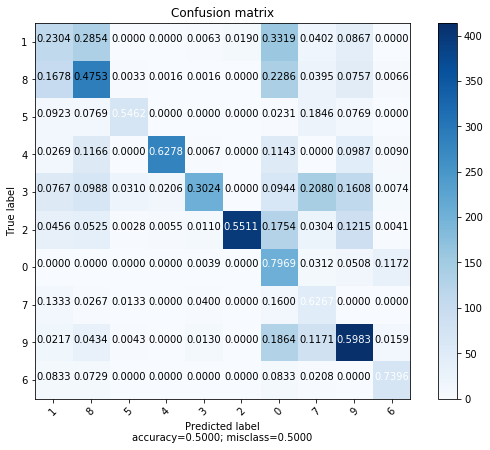

In [32]:
#Original data set
plot_confusion_matrix(conf_mat, target_names=y_test.unique())

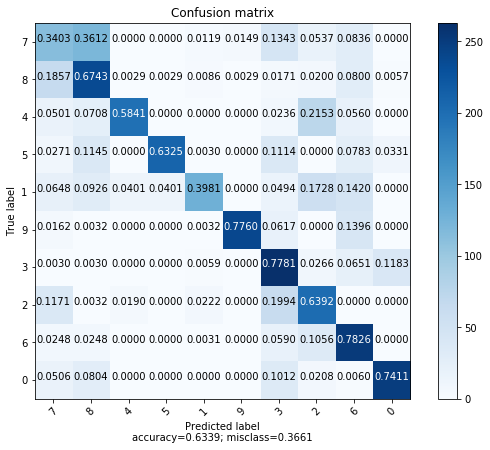

In [33]:
#Resampled data set
plot_confusion_matrix(conf_mat_res, target_names=y_test_res.unique())

In [34]:
# looking for devious class labels that take high numbers of misclassifications
for i in range(conf_mat.shape[1]):
    column = conf_mat.T[i]
    misclassifications = column.sum() - column[i]
    print(i,misclassifications)

0 244
1 341
2 29
3 19
4 28
5 9
6 690
7 321
8 351
9 57


In [35]:
# looking for devious class labels that take high numbers of misclassifications
for i in range(conf_mat_res.shape[1]):
    column = conf_mat_res.T[i]
    misclassifications = column.sum() - column[i]
    print(i,misclassifications)

0 180
1 251
2 20
3 14
4 19
5 6
6 247
7 204
8 214
9 53


## 5. For each of the 10 train_smpl_label files, record the first 10 fields, in order of the absolute correlation value for each street sign.

## Original data set

In [36]:
fileList = [train_smpl_0, train_smpl_1, train_smpl_2, train_smpl_3, train_smpl_4,
            train_smpl_5, train_smpl_6, train_smpl_7, train_smpl_8, train_smpl_9]
for f, file in enumerate(fileList):
    corrArr = []
    for j in file.columns[:-1]:
        corrVal, pVal = stats.pearsonr(file.iloc[:, int(j)], file.iloc[:, -1])
        # Record the absolute value of the correlation
        corrArr.append(math.fabs(corrVal))
    print(f"File {f}:")
    print("10 Largest Correlation Values")
    print(sorted([(x, i) for (i, x) in enumerate(corrArr)], reverse=True)[:10])
    print("10 Smallest Correlation Values")
    print(sorted([(x, i) for (i, x) in enumerate(corrArr)], reverse=True)[-10:])

File 0:
10 Largest Correlation Values
[(0.2697928076389315, 1172), (0.2611057461694063, 1171), (0.25621810693829544, 1468), (0.2532183157062715, 1220), (0.25125887560506865, 1472), (0.24739078010850274, 1221), (0.2462858578397717, 1123), (0.2452240037102454, 1469), (0.24451110504107543, 1419), (0.24358673753047375, 1519)]
10 Smallest Correlation Values
[(0.002174645303031655, 444), (0.00215517194455309, 1156), (0.0017883815233756396, 318), (0.0016318487278948746, 491), (0.0011637229483800156, 917), (0.0011256887248363215, 810), (0.0009688396662611962, 418), (0.0008167816078679992, 1581), (0.0003578060426016993, 1630), (1.229937246482708e-05, 1679)]
File 1:
10 Largest Correlation Values
[(0.2576877416065066, 1094), (0.2572088722901293, 1046), (0.25529256627840846, 1172), (0.25413619996221193, 1142), (0.2538381786322228, 998), (0.2481725316564471, 1190), (0.2476072964617507, 1173), (0.24692877639193458, 997), (0.24635547403592292, 981), (0.24629307447129617, 1045)]
10 Smallest Correlatio

## 6. Naive Bayes using select features (20, 50, 100)

### Methods to run NB:

In [37]:
def run_multi_nb_binary(data, num_feat, class_num):
    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data[data.columns[:2303]], data['target'],
                                                                test_size=0.33, random_state=42)
    clf = MultinomialNB()
    clf.fit(X_train_2, y_train_2)
    print(f"Multinomial for Binary NB Best {num_feat}0: Class {class_num}: {clf.score(X_test_2, y_test_2)}")

def run_multi_nb(data, num_feat):
    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data[data.columns[:2303]], data['target'],
                                                                test_size=0.33, random_state=42)
    clf = MultinomialNB()
    clf.fit(X_train_2, y_train_2)
    print(f"Multinomial NB Best {num_feat}0: {clf.score(X_test_2, y_test_2)}")
    
from sklearn.naive_bayes import GaussianNB
def run_gaus_nb(data, num_feat):
    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data[data.columns[:2303]], data['target'],
                                                                test_size=0.33, random_state=42)
    clf = GaussianNB()
    clf.fit(X_train_2, y_train_2)
    print(f"Multinomial NB Best {num_feat}0: {clf.score(X_test_2, y_test_2)}")
    
def run_gaus_nb_binary(data, num_feat, class_num):
    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data[data.columns[:2303]], data['target'],
                                                                test_size=0.33, random_state=42)
    clf = GaussianNB()
    clf.fit(X_train_2, y_train_2)
    print(f"Multinomial for Binary NB Best {num_feat}0: Class {class_num}: {clf.score(X_test_2, y_test_2)}")


### 6. Select top 2, 5, and 10 features for all train_smpl_label files to create best 20, 50, and 100 sets for all 10 classes - using original datasets

### Original data set

In [38]:
bestSet = [2, 5, 10, 75]
bestDataDict = {} # copy dataframes for later

for i, num in enumerate(bestSet):
    k_best_list = pd.DataFrame()
    # Get top k for each 10 classes
    for f, file in enumerate(fileList):
        k_best = SelectKBest(chi2, k=num).fit_transform(file[file.columns[:2303]], file['target'])
        k_best = pd.DataFrame(k_best)
        k_best_list = pd.concat([k_best_list, k_best], axis=1)
        # print(k_best_list.head())

    print(f"\nBinary NB Classifier {num}0:\n __________________________________")
    # run binary NB classifiers for each class
    for f, file in enumerate(fileList):
        k_best_binary = pd.concat([k_best_list, file['target'].reset_index()], axis=1)
        print(f"K BEST BINARY shape: {k_best_binary.shape}")
        run_multi_nb_binary(k_best_binary, num, f)

    print(f"\nMultilabel NB Classifier {num}0:\n __________________________________")
    k_best_multi = pd.concat([k_best_list, train_smpl['target'].reset_index()], axis=1)
    bestDataDict[f'{num}0'] = k_best_multi.copy()
    print(f"K BEST MULTI shape: {k_best_multi.shape}")
    run_multi_nb(k_best_multi, num)


Binary NB Classifier 20:
 __________________________________
K BEST BINARY shape: (12660, 22)
Multinomial for Binary NB Best 20: Class 0: 0.8963618956438487
K BEST BINARY shape: (12660, 22)
Multinomial for Binary NB Best 20: Class 1: 0.6845380564863571
K BEST BINARY shape: (12660, 22)
Multinomial for Binary NB Best 20: Class 2: 0.8487314504547631
K BEST BINARY shape: (12660, 22)
Multinomial for Binary NB Best 20: Class 3: 0.8678793681187171
K BEST BINARY shape: (12660, 22)
Multinomial for Binary NB Best 20: Class 4: 0.6354715174724749
K BEST BINARY shape: (12660, 22)
Multinomial for Binary NB Best 20: Class 5: 0.8791287697462901
K BEST BINARY shape: (12660, 22)
Multinomial for Binary NB Best 20: Class 6: 0.7285782671134514
K BEST BINARY shape: (12660, 22)
Multinomial for Binary NB Best 20: Class 7: 0.7259454284346577
K BEST BINARY shape: (12660, 22)
Multinomial for Binary NB Best 20: Class 8: 0.7436572522738152
K BEST BINARY shape: (12660, 22)
Multinomial for Binary NB Best 20: Class 

## #Bonus part: running tests 5&6 on the resampled smpl_label dataset

## Create the resampled train_smpl_label datasets:

In [39]:
res_binary_targets = []
for i in range(0,10):
    binary_arr = []
    for j in train_resampled['target']:
        if j == i:
            binary_arr.append(0)
        else:
            binary_arr.append(1)
    bin_arr = pd.DataFrame(binary_arr)
    bin_arr.columns = ['target']
    res_binary_targets.append(bin_arr)

#remove multilabel target column
train_res = train_resampled.drop(labels='target', axis=1)
# train_res.head()
# train_resampled['target'].head()

#add binary target for each class
full_res_binary_targets = []
for idx in range(0, 10):
    binary_df = pd.concat([train_res, res_binary_targets[idx]], axis=1)
    full_res_binary_targets.append(binary_df)
#     print(binary_df)
    
# full_res_multi_targets = pd.concat([train_res, res_binary_targets[idx]], axis=1)
    
# full_res_binary_targets[:3]
# print(full_res_binary_targets[0])

### #5: Resampled data set

In [40]:
for f, file in enumerate(full_res_binary_targets):
    corrArr = []
    for j in file.columns[:-1]:
        corrVal, pVal = stats.pearsonr(file.iloc[:, int(j)], file.iloc[:, -1])
        # Record the absolute value of the correlation
        corrArr.append(math.fabs(corrVal))
    print(f"File {f}:")
    print("10 Largest Correlation Values")
    print(sorted([(x, i) for (i, x) in enumerate(corrArr)], reverse=True)[:10])
    print("10 Smallest Correlation Value")
    print(sorted([(x, i) for (i, x) in enumerate(corrArr)], reverse=True)[-10:])

File 0:
10 Largest Correlation Values
[(0.0311049803889516, 933), (0.030357863356947217, 357), (0.03019957838370801, 980), (0.02990368851013891, 1421), (0.02961292402384102, 1420), (0.029547951628936656, 405), (0.02950971787481369, 404), (0.029199905084574474, 1467), (0.02916040135804961, 932), (0.029159015824510373, 356)]
10 Smallest Correlation Value
[(0.0008245442350230746, 2250), (0.0007436508297266232, 2190), (0.0006970453664750847, 2130), (0.0006230722565211943, 2201), (0.0005251174455448961, 2174), (0.0004113481816764493, 2142), (0.0003460541472760204, 2284), (0.00022291309719053927, 2175), (0.00013910659830506018, 2178), (2.233946495959909e-05, 2221)]
File 1:
10 Largest Correlation Values
[(0.02755981773046826, 1961), (0.027259665378414136, 1914), (0.027127439566971966, 1913), (0.026603747730060093, 2010), (0.026572829432395938, 2009), (0.026469269708407957, 1915), (0.02605422342232531, 1866), (0.025254459801844105, 1962), (0.02456735575137179, 1916), (0.024504776816723986, 186

### #6: Resampled data set

In [41]:
bestSet = [1, 2, 5, 10]

for i, num in enumerate(bestSet):
    k_best_list = pd.DataFrame()
    # Get top k for each 10 classes
    for f, file in enumerate(full_res_binary_targets):
        k_best = SelectKBest(chi2, k=num).fit_transform(file[file.columns[:2303]], file['target'])
        k_best = pd.DataFrame(k_best)
        k_best_list = pd.concat([k_best_list, k_best], axis=1)
#     print(k_best_list)

    print(f"\nBinary NB Classifier {num}0:\n __________________________________")
    # run binary NB classifiers for each class
    for f, file in enumerate(full_res_binary_targets):
        k_best_binary = pd.concat([k_best_list, file['target'].reset_index()], axis=1)
#         print(f"K BEST BINARY: {kbb}")
        run_gaus_nb_binary(k_best_binary, num, f)
#         run_multi_nb_binary(k_best_binary, num, f)

    print(f"\nMultilabel NB Classifier {num}0:\n __________________________________")
    k_best_multi = pd.concat([k_best_list, train_resampled['target'].reset_index()], axis=1)
#     print(f"K BEST MULTI: {kbm}")
    run_gaus_nb(k_best_multi, num)
#     run_multi_nb(k_best_multi, num)


Binary NB Classifier 10:
 __________________________________
Multinomial for Binary NB Best 10: Class 0: 0.9996969696969698
Multinomial for Binary NB Best 10: Class 1: 0.9966666666666667
Multinomial for Binary NB Best 10: Class 2: 1.0
Multinomial for Binary NB Best 10: Class 3: 0.9936363636363637
Multinomial for Binary NB Best 10: Class 4: 0.9960606060606061
Multinomial for Binary NB Best 10: Class 5: 1.0
Multinomial for Binary NB Best 10: Class 6: 1.0
Multinomial for Binary NB Best 10: Class 7: 1.0
Multinomial for Binary NB Best 10: Class 8: 0.9996969696969698
Multinomial for Binary NB Best 10: Class 9: 0.9984848484848485

Multilabel NB Classifier 10:
 __________________________________
Multinomial NB Best 10: 0.9848484848484849

Binary NB Classifier 20:
 __________________________________
Multinomial for Binary NB Best 20: Class 0: 0.996969696969697
Multinomial for Binary NB Best 20: Class 1: 0.99
Multinomial for Binary NB Best 20: Class 2: 0.9933333333333333
Multinomial for Binary 

# Analysis for 4 & 7

### 4. Explain the reason for choosing and using these filters. Once you can run the algorithm, record, compare and analyse the classifier’s accuracy on different classes (as given by the Weka Summary and the confusion matrix).

#### Since we are not using Weka, we did not need to apply any filters to the data before running Naive Bayes.

### 7. What kind of information about this data set did you learn, as a result of the above experiments? You should ask questions such as: Which streets signs are harder to recognise? Which street signs are most easily confused? Which attributes (fields) are more reliable and which are less reliable in classification of street signs? What was the purpose of Tasks 5 and 6? What would happen if the data sets you used in Tasks 4, 5 and 6 were not randomised? What would happen if there is cross-correlation between the non-class attributes? You will get more marks for more interesting and ``out of the box” questions and answers. Explain your conclusions logically and formally, using the material from the lecture notes and from your own reading to interpret the results that Weka produces.

#### Analysis....

## Conclusions from initial experiments (q7)

Using the multilabel confusion matrix, it is apparent that the multinomial Naïve Bayes classifier struggled with some classes, predicting them incorrectly most of the time. 

In particular, class 8 was more often classified as class 1 (probability 0.278), class 7 (probability 0.2023) and class 6 (probability 0.1974) before itself (probability 0.1283).

//It looks like the classifier was confused by ...



The strongest misclassification in the matrix is true members of class 3 being classified as class 7 (probability 0.2023). However, there is relatively very little of the reverse misclassification (true class 7 predicted as class 3).

//^^ investigate this?



Class 7 punches above its weight as the most abundant misclassification which is perhaps due to the relative infrequency of data for class 7. There must be some other factor, as there are less populated classes.



## Complex Bayesian Networks

scikit learn has naive bayes builtin, but not the more complex networks. Weka can be called on to fill the gap.

### K2 Algorithm

In [42]:
import weka.core.jvm as jvm
jvm.start(max_heap_size='7g') # Hopefully big enough

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.6/site-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.6/site-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.6/site-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.6/site-packages/weka/lib/weka.jar', '/usr/local/lib/python3.6/site-packages/weka/lib/python-weka-wrapper.jar']
DEBUG:weka.core.jvm:MaxHeapSize=7g
DEBUG:weka.core.jvm:Package support disabled


In [43]:
data_train_20 = pd.concat([X_train_20, y_train_20], axis=1)
data_test_20 = pd.concat([X_test_20, y_test_20], axis=1)
data_20_features = pd.concat([X_train_20, X_test_20], axis=0) # ask weka to split later

In [44]:
import weka.core.classes as wkcore
from weka.classifiers import Classifier, Evaluation
import os

# cmdline doesn't seem to be working - use the basic classes directly (or at least using the options list)
# cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])

# Weka's naive Bayes, to give comparable results to the sklearn method
NBClassifier = Classifier(classname="weka.classifiers.bayes.NaiveBayes")

# k2, 1-4 parents:  
k2classifiers = []
for i in range(1,5):
    classifier = Classifier(classname="weka.classifiers.bayes.BayesNet", options=["-D", "-Q", "weka.classifiers.bayes.net.search.local.K2", "--", "-P", f"-{i}", "-S", "BAYES", "-E", "weka.classifiers.bayes.net.estimate.SimpleEstimator", "--", "-A", "0.5"])
    k2classifiers.append(classifier)

# TAN 
tanClassifier = Classifier(classname="weka.classifiers.bayes.BayesNet", options=["-D", "-Q", "weka.classifiers.bayes.net.search.local.TAN", "--", "-S", "BAYES", "-E", "weka.classifiers.bayes.net.estimate.SimpleEstimator", "--", "-A", "0.5"])

In [45]:
# Don't downsize - use it all! train_resampled has some 12k instances, so this takes a while
# use cached tsne results if we can, we don't have all day
from sklearn.manifold import TSNE
import pickle
try:
    with open('X_train_2D_t_emb.pickle', 'rb') as f:
        unpickled = pickle.load(f)
        X_train_2D_t_emb = unpickled
except: # no file 
    print('No cache, running t-SNE')
    X_train_2D_t_emb = TSNE(perplexity=30).fit_transform(X_train_res)
    with open('X_train_2D_t_emb.pickle', 'wb') as f:
        pickle.dump(X_train_2D_t_emb, f, pickle.HIGHEST_PROTOCOL)

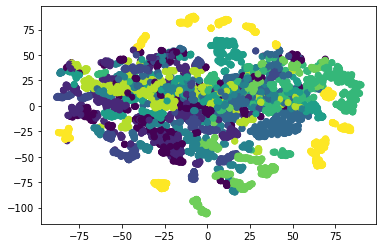

In [46]:
plt.figure()
plt.scatter(x=unpickled[:,0], y=unpickled[:,1], c=y_train_res)
# plt.legend(labels=y_train_res.unique())
plt.show()

In [47]:
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure()
# ax = Axes3D(fig)
# for label in range(10):
#     x_train_tmp = X_wee_3_embeds[y_train_wee==label]
#     ax.scatter(x_train_tmp[:,0], x_train_tmp[:,1], x_train_tmp[:,2], 
#                alpha=0.75, label=label)
# ax.legend()
# plt.show()

In [48]:
# receive arff
# from weka.core.converters import Loader
# loader = Loader(classname="weka.core.converters.ArffLoader")
# arffData = loader.load_file(os.getcwd() + '/' + 'data_train_20.arff')

# Use ndarray_to_instances to convert numpy -> weka
import weka.core.converters as wekaconv
y_train_res_np = y_train_res.to_numpy(copy=True).reshape(-1, 1)

best100np_alt = bestDataDict['100'].to_numpy().copy(order='C')
print(best100np_alt.shape)

best100np = train_smpl_100.to_numpy().copy(order='C')

weka_train = wekaconv.ndarray_to_instances(best100np_alt, "train_resampled")
weka_train.class_is_last()

print(weka_train.get_instance(0))

(12660, 102)
29,29,41,32,30,29,36,32,28,28,38,46,49,34,51,34,29,27,49,34,39,28,50,36,28,50,41,30,50,36,127,108,59,71,88,47,41,39,43,40,55,44,45,45,39,38,38,33,32,30,30,31,35,32,35,47,36,47,37,47,26,29,37,37,37,39,41,38,31,39,43,37,40,29,25,36,27,27,33,28,52,50,48,46,51,41,48,36,38,38,31,42,32,46,48,45,38,47,46,43,1236,0


In [49]:
# Fix "class is numeric"
# First create a Filter to do the job
from weka.filters import Filter
nominaliser = Filter(classname='weka.filters.unsupervised.attribute.NumericToNominal', options=['-R', 'last']) 
renominaliser = Filter(classname='weka.filters.unsupervised.attribute.NumericToNominal', options=['-R', 'last']) 

randomiser = Filter(classname='weka.filters.unsupervised.instance.Randomize', options=['-S', '42'])

# Standardise
standardiser = Filter(classname='weka.filters.unsupervised.attribute.Standardize') 

# Use PCA to reduce dimensionality? Default Weka settings
# This option was too expensive.
# pcaFilter = Filter(classname='weka.filters.unsupervised.attribute.PrincipalComponents', options=['-R', '0.95', '-A', '5', '-M', '-1']) 

# Finally, apply the filters to the data
nominaliser.inputformat(weka_train)
standardiser.inputformat(weka_train)
# pcaFilter.inputformat(weka_train)
randomiser.inputformat(weka_train)

# necessary for getting the input formats
partFilteredData = randomiser.filter(standardiser.filter(nominaliser.filter(weka_train)))

# "class is numeric" reappears after filter applications. We still need to do it at the start
# so that the class isn't standardised in that filter
renominaliser.inputformat(partFilteredData)

filterSet = [nominaliser, standardiser, randomiser, renominaliser]

filteredData = renominaliser.filter(partFilteredData)
filteredData.class_is_last()

print(filteredData.get_instance(5000))
from weka.core.converters import Saver
saver = Saver(classname="weka.core.converters.ArffSaver")
saver.save_file(weka_train, "weka_train.arff")

-0.059223,-0.115191,-0.166732,-0.170007,-0.333426,-0.466256,0.363029,1.113285,1.043311,1.057956,1.755075,1.699592,1.497406,1.565298,1.378647,1.430828,-0.115191,-0.17159,1.408377,1.427324,-0.273192,-0.256155,-0.319116,-0.295385,-0.292149,-0.323671,-0.295107,-0.301653,-0.308774,-0.320874,0.824843,1.354784,1.344157,0.299993,0.730657,1.348999,1.369792,0.588676,0.270964,0.618033,1.359259,1.413461,1.459741,1.566951,1.599525,1.634694,1.728483,1.72401,1.766585,1.8502,-0.184304,-0.129994,-0.159274,-0.157757,-0.135907,-0.229589,-0.15279,-0.208524,-0.164684,-0.218649,0.409609,-0.409627,0.675545,0.43467,0.786836,1.978774,1.169586,-0.4195,-0.412029,0.094999,-0.372137,0.107573,0.15634,0.221471,0.152117,0.171144,0.251272,0.177375,0.107748,0.160378,-0.159129,-0.219728,0.034494,1.083039,0.660409,1.174368,1.135543,0.363029,1.060044,1.014766,-0.129994,-0.208618,-0.157757,-0.10094,-0.117155,-0.171151,-0.158964,-0.151853,-0.149007,0.449578,-0.263354,4


In [50]:
# Define experiment
from weka.core.classes import Random
from weka.classifiers import FilteredClassifier

def curry_filters(arg_filterSet, arg_classifier):
    '''
    If you count a classifier as a function, then each loop inside this is kind of a partial application.
    '''
    fc = FilteredClassifier()

    for i, filt in enumerate(arg_filterSet):
        tmp_fc = FilteredClassifier()
        tmp_fc.classifier = Classifier.make_copy(arg_classifier) if i == 0 else fc
        tmp_fc.filter = filt
        fc = tmp_fc
    return fc

def run_weka_test(data, classifier):
    eva = Evaluation(data)
    eva.evaluate_train_test_split(classifier, data, 66.7, rnd=Random(42))
    return eva

def print_results(evaluation, name):
    print(f"{evaluation.summary()}")
    plot_confusion_matrix(evaluation.confusion_matrix, target_names=y_train_res.unique().sort(), title=name)
    return evaluation

# def save_results(name, evaluation):
    


K2, 1 parent:
 __________________________________
(6700, 21)
data: 21 attributes, 6700 instances

Correctly Classified Instances         213                9.5473 %
Incorrectly Classified Instances      2018               90.4527 %
Kappa statistic                          0     
Mean absolute error                      0.18  
Root mean squared error                  0.3001
Relative absolute error                100.0169 %
Root relative squared error            100.0207 %
Total Number of Instances             2231     



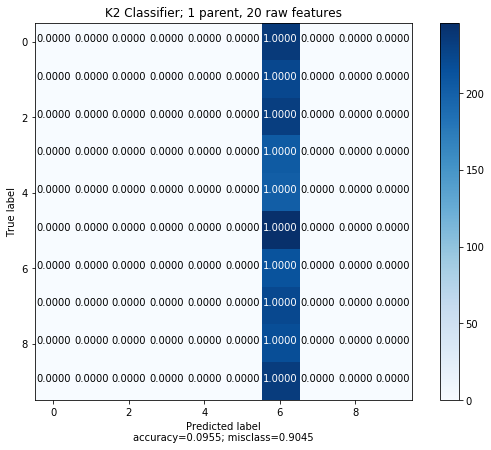

weka.classifiers.Evaluation@19d1dc6c

In [51]:
# test with simple feature selection 
print(f"\nK2, 1 parent:\n __________________________________")
print(data_train_20.shape)
arff_data_train_20 = wekaconv.ndarray_to_instances(data_train_20.to_numpy().copy(order='C'), "20_features")
arff_data_train_20.class_is_last()

nominaliser_side = Filter(classname='weka.filters.unsupervised.attribute.NumericToNominal', options=['-R', 'last']) 
nominaliser_side.inputformat(arff_data_train_20)
print(f"data: {arff_data_train_20.num_attributes} attributes, {arff_data_train_20.num_instances} instances")

evalu = run_weka_test(nominaliser_side.filter(arff_data_train_20), curry_filters([nominaliser_side], k2classifiers[0]))
print_results(evalu, 'K2 Classifier; 1 parent, 20 raw features')


Naive Bayes Classifier (for comparison):
 __________________________________
Data: 102 attributes, 12660 instances

Correctly Classified Instances        2787               66.1053 %
Incorrectly Classified Instances      1429               33.8947 %
Kappa statistic                          0.6109
Mean absolute error                      0.0681
Root mean squared error                  0.2564
Relative absolute error                 39.3704 %
Root relative squared error             87.2418 %
Total Number of Instances             4216     



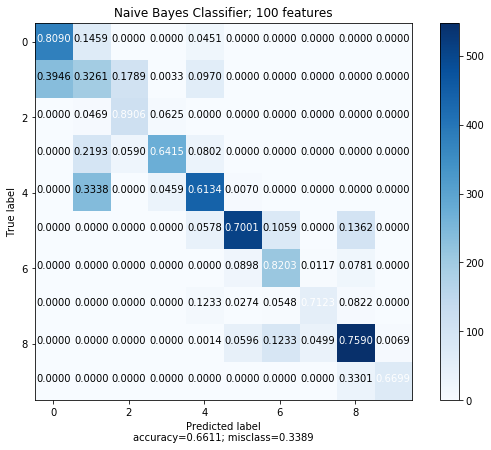


K2 Classifier, 1 Parent; 100 features:
 __________________________________

Correctly Classified Instances        2345               55.6214 %
Incorrectly Classified Instances      1871               44.3786 %
Kappa statistic                          0.5044
Mean absolute error                      0.0886
Root mean squared error                  0.2887
Relative absolute error                 51.104  %
Root relative squared error             97.964  %
Total Number of Instances             4216     



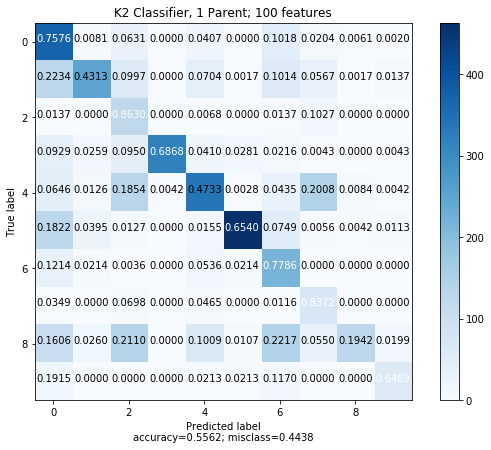


K2 Classifier, 2 Parents; 100 features:
 __________________________________

Correctly Classified Instances        2278               54.0323 %
Incorrectly Classified Instances      1938               45.9677 %
Kappa statistic                          0.4875
Mean absolute error                      0.0918
Root mean squared error                  0.2951
Relative absolute error                 53.012  %
Root relative squared error            100.3309 %
Total Number of Instances             4216     



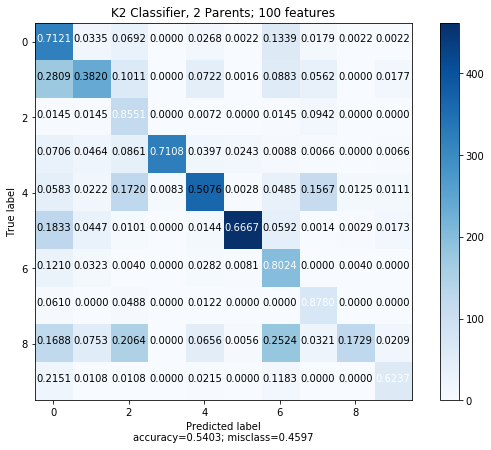


K2 Classifier, 3 Parents; 100 features:
 __________________________________

Correctly Classified Instances        2249               53.3444 %
Incorrectly Classified Instances      1967               46.6556 %
Kappa statistic                          0.4793
Mean absolute error                      0.0935
Root mean squared error                  0.2978
Relative absolute error                 53.9366 %
Root relative squared error            101.1448 %
Total Number of Instances             4216     



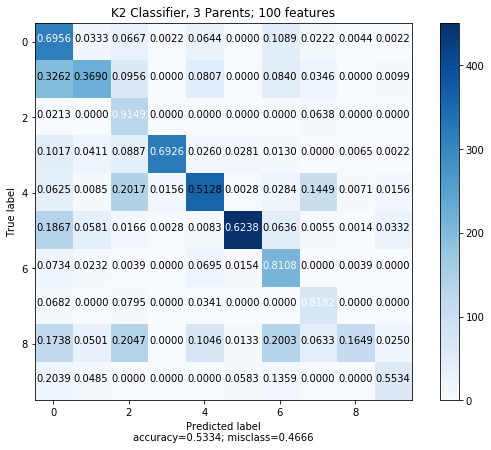


K2 Classifier, 4 Parents; 100 features:
 __________________________________

Correctly Classified Instances        2297               54.4829 %
Incorrectly Classified Instances      1919               45.5171 %
Kappa statistic                          0.4922
Mean absolute error                      0.091 
Root mean squared error                  0.293 
Relative absolute error                 52.5074 %
Root relative squared error             99.4761 %
Total Number of Instances             4216     



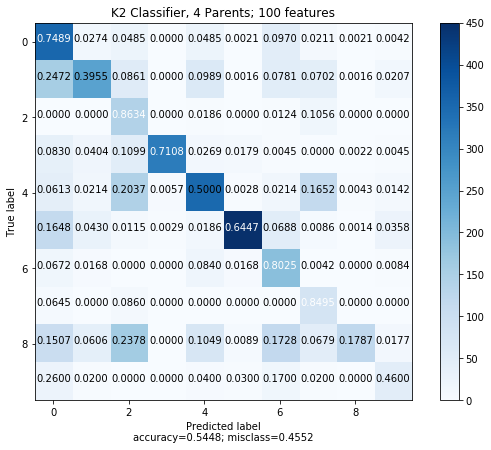


TAN Classifier:
 __________________________________

Correctly Classified Instances        4034               95.6831 %
Incorrectly Classified Instances       182                4.3169 %
Kappa statistic                          0.9502
Mean absolute error                      0.0098
Root mean squared error                  0.085 
Relative absolute error                  5.6624 %
Root relative squared error             28.8553 %
Total Number of Instances             4216     



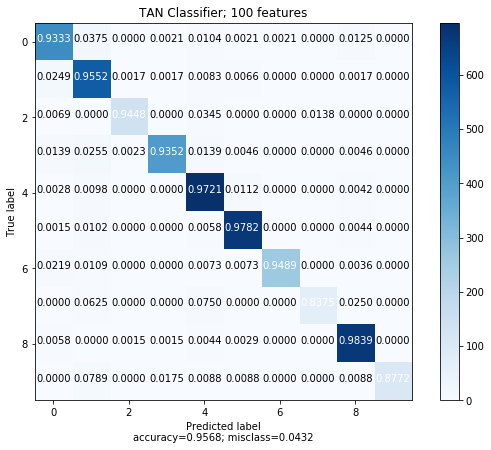

weka.classifiers.Evaluation@1721f42b

In [52]:
# Run experiment

# Naive Bayes
print(f"\nNaive Bayes Classifier (for comparison):\n __________________________________")
print(f"Data: {filteredData.num_attributes} attributes, {filteredData.num_instances} instances")
nominal_target_data = nominaliser.filter(weka_train)

print_results(run_weka_test(nominal_target_data, curry_filters(filterSet, NBClassifier)), "Naive Bayes Classifier; 100 features")

# K2
for i, cls in enumerate(k2classifiers):

    s = 's' if i != 0 else ''
    title = f"K2 Classifier, {i+1} Parent{s}; 100 features"
    print(f"\n{title}:\n __________________________________")
    print_results(run_weka_test(nominal_target_data, curry_filters(filterSet, cls)), title)

# TAN
print(f"\nTAN Classifier:\n __________________________________")
print_results(run_weka_test(nominal_target_data, curry_filters(filterSet, tanClassifier)), "TAN Classifier; 100 features")


In [53]:
# save trained classifiers
import weka.core.serialization as cereal
cereal.write('evalu.saved', evalu)
for i, cls in enumerate(k2classifiers):
    s = 's' if i!=0 else ''
    cereal.write(f'k2classifier{i+1}parent{s}.saved', k2classifiers[i])

# with open('tanClassifier.pickle', 'wb') as f:
#     # Pickle the 'data' dictionary using the highest protocol available.
#     pickle.dump(tanClassifier, f, pickle.HIGHEST_PROTOCOL)

In [54]:
read_tan = Classifier(jobject=cereal.read('tanClassifier.saved'))
print("read_tan:\n", read_tan)
print("original tan:\n", tanClassifier)
# read_evalu = Evaluation(jobject=cereal.read('evalu.saved'))

# print("read evalu:\n", read_evalu)

read_tan:
 Bayes Network Classifier
not using ADTree: No model built yet.
original tan:
 Bayes Network Classifier
not using ADTree: No model built yet.


In [55]:
jvm.stop() # finished with weka; release the memory - we're going to need it

## 10. Clustering

In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=[0, 1])

# pca = PCA(n_components=50)
# smpl_data = pd.DataFrame(pca.fit_transform(train_resampled[train_resampled.columns[:-1]]))
# smpl_data = pd.DataFrame(scaler.fit_transform(smpl_data))
# smpl_data["target"] = train_smpl["target"]

# Training sample for train_smpl

smpl_data = train_smpl.copy()

kmeans = KMeans(n_clusters=10, random_state=2)
smpl_data["cluster"] = kmeans.fit_predict(smpl_data[smpl_data.columns[:-1]])
# smpl_data["w_class_attribute"] = kmeans.fit_predict(smpl_data[smpl_data.columns[:-1]])

resampled_data = train_resampled.copy()

kmeans = KMeans(n_clusters=10, random_state=2)
resampled_data["cluster"] = kmeans.fit_predict(resampled_data[resampled_data.columns[:-1]])
# resampled_data["w_class_attribute"] = kmeans.fit_predict(resampled_data[resampled_data.columns[:-1]])

In [57]:
# Training sample for train_smpl_<label> 
training_dataframe = [train_smpl_0.copy(), train_smpl_1.copy(), train_smpl_2.copy(), train_smpl_3.copy(), train_smpl_4.copy(),
                      train_smpl_5.copy(), train_smpl_6.copy(), train_smpl_7.copy(), train_smpl_8.copy(), train_smpl_9.copy()]

kmeans = KMeans(n_clusters=2, random_state=2)
for dataframe in training_dataframe:
    dataframe["cluster"] = kmeans.fit_predict(dataframe[dataframe.columns[:-1]])

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# print(target.groupby(['target']).count())
# result_class_attribute = result.groupby(['target', 'cluster_class_attribute']).count()
# result_cluster["class"] = result_class_attribute["cluster"]

def plot_clustering(result, nb_attribute, nb_cluster, name_cluster="cluster"):
    df = result[result.columns[-3:]]
    result_cluster = df.groupby(['target', name_cluster]).count()
    result_cluster.reset_index(inplace=True)
    result_data = []
    for i in range(0, nb_cluster):
        result_data.append([])
        if name_cluster == "w_class_attribute":
            data = result_cluster[result_cluster.w_class_attribute == i].drop([name_cluster], axis=1).to_dict('split')['data']
        else:
            data = result_cluster[result_cluster.cluster == i].drop([name_cluster], axis=1).to_dict('split')['data']
        data = [{x[0]: x[1]} for x in data]
        data = dict(pair for d in data for pair in d.items())
        for j in range(0, nb_attribute):
            result_data[i].append(data[j] if j in data else 0)

    data = np.array(result_data)

    color_list = ['#FC7A57', '#EEFC57', '#5E5B52', '#8DB580', '#BBE5ED', '#4281A4', '#BAD9B5', '#CA7DF9', '#04E762', '#723D46']

    X = np.arange(data.shape[1])
    for i in range(data.shape[0]):
        plt.bar(X, data[i],
            bottom = np.sum(data[:i], axis = 0),
            color = color_list[i % len(color_list)],
               label=f"Cluster {i}")

    plt.legend(loc="best", bbox_to_anchor=(1.0, 1.00))
    plt.show()

Training sample all data (without class attribute):


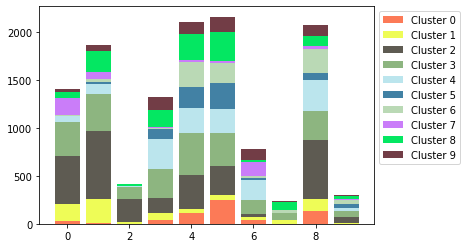

Training resample data (without class attribute):


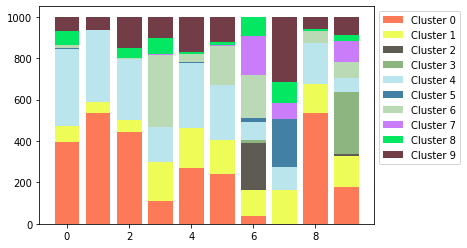

In [59]:
"""
# Plot train_smpl_<label> clusters
i = 0
for dataframe in training_dataframe:
    print(f"Training sample n°{i}:")
    plot_clustering(dataframe, 10, 2)
    i += 1
"""
# Plot train_smpl clusters
print(f"Training sample all data (without class attribute):")
plot_clustering(smpl_data, 10, 10)
# print(f"Training sample all data (with class attribute):")
# plot_clustering(smpl_data, 10, 10, 'w_class_attribute')

# Plot train_smpl resampled clusters
print(f"Training resample data (without class attribute):")
plot_clustering(resampled_data, 10, 10)
# print(f"Training resample data (with class attribute):")
# plot_clustering(resampled_data, 10, 10, 'w_class_attribute')

## 11. Clustering notes

The clustering classification is not as good as the Gaussian Naives model. It struggle with attributing the classes to the good target.

When it is trained with the individual sample the two cluster doesn't separate the specific class from the other classes. But for the sample n°2 all the class is in one cluster, but the cluster also contains a lot of other classes.

The classification obtained with and without class attribute are the same. Maybe we should change weight on the class attribute so there is more impact on the distribution.

I did some tests with using PCA (Principal component analysis) which convert a set of observations of possibly correlated variables to reduce the number of attributes of the samples. And some other with the MinMax scaler. But theses preprocess didn't improve the result, the cluster are still very distributed among the classes.

When we are comparing the result between basic sample of all data and the resample one, in both of the results the cluster are very distrubuted amoug the different classes. But we can notice in the resample result, that for the target 6 and 7, 9 they have almost a dedicated a cluster (corresponding in the order of cluster 5, 8 and 7)

## 12. Other clustering algorithms

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
smpl_data_pca = pd.DataFrame(pca.fit_transform(train_resampled[train_resampled.columns[:-1]]))

In [61]:
from sklearn.cluster import OPTICS

smpl_data_optics = smpl_data_pca.copy()

optics = OPTICS(min_samples=45, max_eps=450)
smpl_data_optics["target"] = train_resampled["target"]
smpl_data_optics["cluster"] = optics.fit_predict(smpl_data_optics[smpl_data_optics.columns[:-1]])

In [62]:
from sklearn.cluster import Birch

smpl_data_birch = smpl_data_pca.copy()

birch = Birch(n_clusters=10)
smpl_data_birch["target"] = train_resampled["target"]
smpl_data_birch["cluster"] = birch.fit_predict(smpl_data_birch[smpl_data_birch.columns[:-1]])

In [63]:
from sklearn.cluster import MeanShift

smpl_data_mean_shift = smpl_data_pca.copy()

mean_shift = MeanShift(bandwidth=2300)
smpl_data_mean_shift["target"] = train_resampled["target"]
smpl_data_mean_shift["cluster"] = mean_shift.fit_predict(smpl_data_mean_shift[smpl_data_mean_shift.columns[:-1]])

Training resample data with OPTICS clustering:


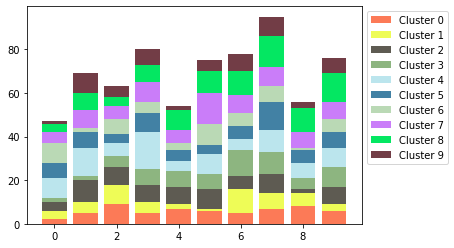

Training resample data with Birch clustering:


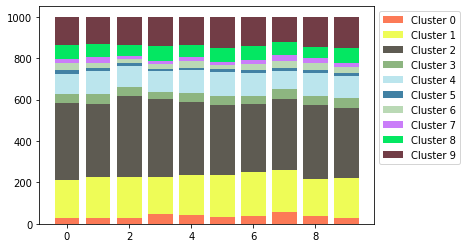

Training resample data with MeanShift clustering:


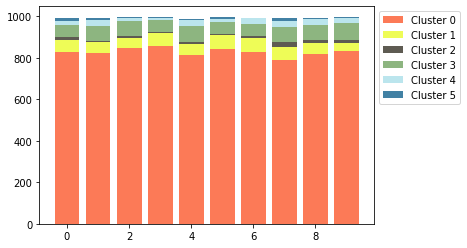

In [64]:
print(f"Training resample data with OPTICS clustering:")
plot_clustering(smpl_data_optics, 10, max(optics.labels_))

print(f"Training resample data with Birch clustering:")
plot_clustering(smpl_data_birch, 10, 10)

print(f"Training resample data with MeanShift clustering:")
plot_clustering(smpl_data_mean_shift, 10, max(mean_shift.labels_))

## 13. Other clustering algorithms notes

We are testing the resampled dataset with 3 different clustering algorithm: Optics, Birch and MeanShift. To improving speed of theses clustering algorithms, we are using PCA which reduce the number of component to analyse.

Optics algorithm views clusters as areas of high density separated by areas of low density. Clusters found by Optics can be any shape and Optics can also ignore sample so it won't classify to any cluster. We use parameter for Optics 45 sample minimum in each cluster and 450 for the density necessary to form a cluster.

Birch algorithm reduces the input data to a set of subclusters and then do the clustering on theses subclusters. For this algorithm we are using the default value of scikit learn which are 0.5 threshold and 50 for branching factor.

MeanShift algorithm is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. We are using 2300 for bandwidth. 

Even we other clustering algorithms the cluster result are not very successful, it doesn't separate the classes and for each test there are about the same proportion of cluster for each class.


(The descriptions of algorithms is coming from: https://scikit-learn.org/stable/modules/clustering.html)

## 14. Research Question

### Create datasets that have 1 class removed - original dataset

In [65]:
import copy
#Remove 2, 9, and 6
rem_images = [2, 9, 6]
train_smpl_copy_2 = copy.deepcopy(train_smpl)
train_smpl_copy_9 = copy.deepcopy(train_smpl)
train_smpl_copy_6 = copy.deepcopy(train_smpl)
dataSet = [train_smpl_copy_2, train_smpl_copy_9, train_smpl_copy_6]
removed_classes = []
for d, data in enumerate (dataSet):
    #Iterate through rows and identify ones that have the key 
    print(f"d: {d}")
    removed_class = []
    for idx, row in data.iterrows():
        if row['target'] == rem_images[d]:
            removed_class.append(row)
            data.drop([idx], inplace=True)
    removed_class_df = pd.DataFrame(removed_class)
    removed_classes.append(removed_class_df)
    print("~~~~NEXT~~~~")

print(f"removed classes: {removed_classes[0]}")
# train_smpl_copy_6.head()
    


d: 0
~~~~NEXT~~~~
d: 1
~~~~NEXT~~~~
d: 2
~~~~NEXT~~~~
removed classes:           0      1      2      3      4      5      6      7      8      9  \
3328   37.0   32.0   30.0   57.0   47.0   40.0   41.0   28.0   26.0   39.0   
3528   29.0   32.0   33.0   32.0   34.0   34.0   34.0   34.0   30.0   28.0   
3529   52.0   42.0   35.0   36.0   37.0   36.0   35.0   34.0   41.0   40.0   
3447   28.0   28.0   27.0   29.0   27.0   26.0   26.0   24.0   24.0   26.0   
3404   19.0   20.0   20.0   20.0   21.0   21.0   22.0   22.0   22.0   22.0   
3325   47.0   34.0   36.0   48.0   52.0   49.0   50.0   30.0   33.0   51.0   
3422   33.0   33.0   32.0   32.0   32.0   33.0   34.0   34.0   34.0   35.0   
3413   25.0   27.0   34.0   34.0   32.0   30.0   29.0   27.0   26.0   30.0   
3433   29.0   30.0   31.0   31.0   31.0   30.0   30.0   29.0   30.0   29.0   
3344   11.0   12.0   12.0   12.0   12.0   12.0   11.0   11.0   11.0   11.0   
3678   30.0   30.0   30.0   30.0   30.0   29.0   28.0   28.0   28.0   2

In [66]:
print(f"Train smpl copy 6: {train_smpl_copy_6}")

Train smpl copy 6:            0      1      2      3      4      5      6      7      8      9  \
1236    25.0   24.0   28.0   27.0   24.0   22.0   22.0   22.0   21.0   21.0   
8847   255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
11285   34.0   34.0   34.0   33.0   32.0   31.0   31.0   30.0   30.0   30.0   
12423   63.0   66.0   70.0   81.0   77.0   72.0   62.0   61.0   60.0   62.0   
3015    34.0   33.0   34.0   36.0   38.0   37.0   52.0   86.0  130.0   78.0   
11763   30.0   33.0   36.0   30.0   26.0   24.0   23.0   24.0   30.0   47.0   
4475    79.0   75.0  109.0  133.0  129.0  147.0  197.0  229.0  248.0  255.0   
5098    88.0   74.0   66.0   94.0   76.0   95.0   70.0   95.0   70.0   95.0   
624     19.0   18.0   20.0   19.0   21.0   22.0   20.0   19.0   20.0   21.0   
12618   37.0   36.0   36.0   36.0   35.0   40.0   56.0   73.0   72.0   73.0   
8384   138.0  153.0  211.0  246.0  176.0  171.0  170.0  177.0  206.0  212.0   
7359   239.0  215.0  188.0  162.0

In [67]:
print(removed_classes[0].shape)
print(removed_classes[1].shape)
print(removed_classes[2].shape)

print(f"Rem classes: {removed_classes[0]}")
# print(f"Rem classes: {removed_classes[1]}")
# print(f"Rem classes: {removed_classes[2]}")

(420, 2305)
(300, 2305)
(780, 2305)
Rem classes:           0      1      2      3      4      5      6      7      8      9  \
3328   37.0   32.0   30.0   57.0   47.0   40.0   41.0   28.0   26.0   39.0   
3528   29.0   32.0   33.0   32.0   34.0   34.0   34.0   34.0   30.0   28.0   
3529   52.0   42.0   35.0   36.0   37.0   36.0   35.0   34.0   41.0   40.0   
3447   28.0   28.0   27.0   29.0   27.0   26.0   26.0   24.0   24.0   26.0   
3404   19.0   20.0   20.0   20.0   21.0   21.0   22.0   22.0   22.0   22.0   
3325   47.0   34.0   36.0   48.0   52.0   49.0   50.0   30.0   33.0   51.0   
3422   33.0   33.0   32.0   32.0   32.0   33.0   34.0   34.0   34.0   35.0   
3413   25.0   27.0   34.0   34.0   32.0   30.0   29.0   27.0   26.0   30.0   
3433   29.0   30.0   31.0   31.0   31.0   30.0   30.0   29.0   30.0   29.0   
3344   11.0   12.0   12.0   12.0   12.0   12.0   11.0   11.0   11.0   11.0   
3678   30.0   30.0   30.0   30.0   30.0   29.0   28.0   28.0   28.0   28.0   
3592   39.0   3

### Method for plotting frequency of classification

In [68]:
# Adapted from: https://stackoverflow.com/questions
# /50845998/matplotlib-bar-chart-that-shows-frequency-of-unique-values

def make_plot(title, result):
    plt.hist(result, bins=np.arange(10)-0.5)
    plt.title(title)
    plt.xlabel("Classes")
    plt.ylabel("No of Classifications")
    plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10],label=[0,1,2,3,4,5,6,7,8,9,10])
    plt.show()

### Run Multinomial NB

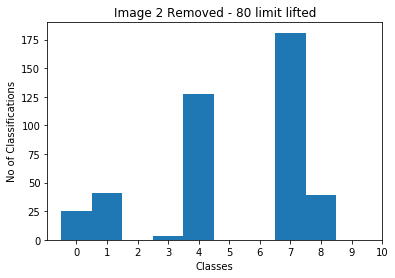

Result 2: [0 4 4 7 7 3 7 7 7 4 7 7 4 7 4 7 7 7 7 4 7 7 7 4 7 4 4 4 4 7 4 7 4 7 7 4 7
 7 4 4 8 7 7 7 7 4 1 7 4 4 7 4 1 1 7 9 4 7 1 9 1 4 7 7 7 4 9 7 1 7 7 9 0 4
 4 1 7 4 7 4 8 8 7 4 4 4 8 8 7 7 7 7 7 4 7 7 4 7 7 7 4 1 8 7 8 7 4 7 7 1 4
 1 7 4 4 7 7 4 7 7 1 7 4 4 7 7 7 4 7 7 4 7 7 4 7 4 7 8 7 1 4 7 8 1 7 7 7 0
 4 4 4 4 1 8 4 4 7 7 4 4 4 0 7 1 4 4 3 4 7 7 0 7 4 7 7 7 4 4 4 7 0 7 7 4 7
 4 7 7 8 7 1 8 4 7 8 7 7 4 4 7 4 7 4 4 7 4 0 7 4 8 8 1 0 7 4 4 4 7 8 0 7 4
 7 0 4 8 8 7 7 1 7 7 7 8 7 8 7 8 7 0 1 1 4 7 0 0 7 4 0 4 1 4 7 1 4 0 7 7 7
 4 0 1 4 7 7 7 4 0 7 7 7 7 7 7 4 4 7 4 1 7 4 7 8 4 1 1 4 8 7 7 4 1 7 1 4 7
 4 3 4 7 1 7 8 1 7 4 1 8 7 0 8 1 8 7 0 7 4 1 0 4 4 7 1 4 8 4 4 4 7 7 4 7 0
 7 4 8 7 1 4 4 7 8 4 4 7 7 7 7 1 7 8 8 7 8 7 7 1 7 4 7 7 7 8 4 8 4 0 7 7 4
 0 1 7 7 4 7 4 1 7 7 7 1 4 7 4 4 7 4 7 4 8 4 7 7 7 8 4 4 7 7 8 7 7 7 4 4 7
 0 7 7 4 7 7 8 4 1 0 7 7 4]


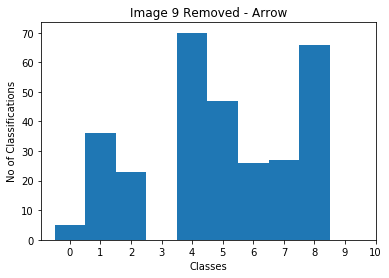

Result 9: [4 2 2 8 5 5 7 4 8 4 8 1 4 5 8 8 2 4 1 5 7 7 8 5 1 8 6 7 2 4 6 2 4 1 1 8 1
 8 4 7 6 5 7 5 1 8 5 8 2 6 2 8 4 4 6 1 7 8 2 4 2 1 7 5 5 8 4 7 5 1 2 2 6 6
 8 8 7 4 8 6 1 1 8 4 6 5 4 2 4 4 5 4 5 8 4 4 7 4 8 1 1 5 5 4 0 8 8 1 2 4 8
 8 5 4 4 4 5 0 6 8 8 1 5 5 5 5 4 4 4 1 8 2 6 8 6 5 1 7 6 1 7 6 1 7 4 8 5 8
 8 4 6 4 8 6 5 1 1 6 2 2 4 7 8 4 7 4 2 4 5 6 6 5 7 4 4 5 4 8 7 8 4 8 4 5 7
 5 1 4 8 4 4 8 8 7 1 8 8 5 4 8 8 2 8 4 5 8 1 2 6 1 8 5 4 7 1 6 8 1 1 4 1 8
 2 5 5 1 5 4 4 5 4 5 8 5 0 8 5 8 8 4 4 6 2 4 8 8 5 4 1 4 7 0 4 8 2 1 4 5 4
 4 6 7 2 8 1 8 5 6 7 5 7 4 8 8 4 6 8 4 5 4 8 1 7 6 4 5 8 8 8 5 4 4 4 1 4 7
 4 8 8 0]


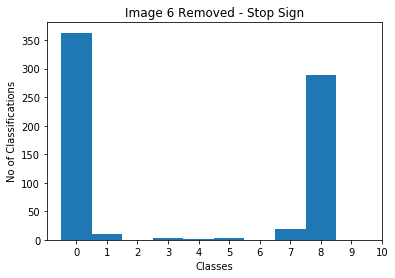

Result 6: [0 9 0 8 9 0 0 0 0 8 1 0 7 9 8 9 0 0 0 0 0 8 0 8 8 8 0 8 8 0 0 9 9 8 8 0 8
 8 0 0 0 0 8 0 0 0 0 0 1 0 8 0 0 0 8 8 0 0 0 9 8 8 9 0 0 9 8 8 8 0 8 0 0 8
 9 8 0 9 8 8 0 9 8 8 8 4 8 8 0 8 0 0 0 0 0 8 9 0 0 8 0 8 8 0 9 8 0 0 8 0 0
 0 8 0 0 0 8 8 8 8 8 0 8 8 0 0 8 8 8 8 0 0 8 0 0 8 9 0 0 0 0 8 9 9 0 1 0 9
 0 0 9 9 8 0 8 8 0 0 8 8 9 8 8 0 8 8 8 8 8 9 0 8 9 0 0 7 9 0 0 0 9 0 7 0 8
 9 8 8 0 0 0 0 9 9 0 0 8 0 0 8 8 0 0 3 9 8 1 8 9 8 8 8 8 0 0 0 0 8 9 8 0 8
 0 0 0 8 9 0 0 8 0 0 8 0 0 9 9 1 8 7 9 0 0 8 0 0 0 8 0 0 8 0 1 8 0 8 0 0 8
 7 0 9 0 0 9 9 8 9 0 8 8 8 8 8 8 9 0 0 1 0 0 0 0 9 7 0 0 8 3 0 8 0 9 0 0 0
 0 8 8 0 0 0 0 8 0 8 9 8 0 8 0 9 0 9 0 8 0 8 7 8 0 9 9 0 0 8 8 0 0 0 0 8 0
 0 0 0 8 8 9 8 0 0 8 8 8 8 0 9 9 9 8 8 8 8 0 8 0 0 0 0 0 8 8 0 8 9 0 9 8 8
 0 8 9 0 8 0 8 8 0 8 8 9 8 8 0 8 8 0 9 9 0 8 9 0 8 8 8 8 0 0 0 0 0 0 8 8 8
 0 0 0 8 9 9 8 8 9 0 0 0 8 3 8 9 0 0 8 0 8 9 0 8 0 0 0 0 0 0 0 8 8 8 0 8 0
 0 9 9 5 8 9 7 0 8 0 8 8 5 0 8 0 0 7 9 8 0 9 0 0 0 7 8 0 8 0 0 8 0 1 0 0 8
 0 8 8 0 0 8 9 

In [69]:
# # new instances where we do not know the answer
# Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
# # make a prediction
# ynew = model.predict(Xnew)
# # show the inputs and predicted outputs
# for i in range(len(Xnew)):
# 	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

idx = [0,1,2,3,4,5,6,7,8,9]
#Image 2 removed
clf = MultinomialNB()
clf.fit(train_smpl_copy_2.iloc[:,:-1], train_smpl_copy_2.iloc[:,-1])
result_2 = clf.predict(removed_classes[0].iloc[:,:-1])
make_plot("Image 2 Removed - 80 limit lifted", result_2)
print(f"Result 2: {result_2}")


#Image 9 removed
clf = MultinomialNB()
clf.fit(train_smpl_copy_9.iloc[:,:-1], train_smpl_copy_9.iloc[:,-1])
result_9 = clf.predict(removed_classes[1].iloc[:,:-1])
make_plot("Image 9 Removed - Arrow", result_9)
print(f"Result 9: {result_9}")

#Image 6 removed
clf = MultinomialNB()
clf.fit(train_smpl_copy_6.iloc[:,:-1], train_smpl_copy_6.iloc[:,-1])
result_6 = clf.predict(removed_classes[2].iloc[:,:-1])
make_plot("Image 6 Removed - Stop Sign", result_6)
print(f"Result 6: {result_6}")